In [ ]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

In [1]:
import pandas as pd
import numpy as np

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

###`Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [5]:
# code here
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
bird = pd.DataFrame(data)
bird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 480.0+ bytes


In [6]:
# show Alternate rows of the dataframe.
alternate_row = bird.iloc[::2]
alternate_row

,birds,age,visits,priority
0,Cranes,3.5,2,yes
2,plovers,1.5,3,no
4,spoonbills,6.0,3,no
6,plovers,5.5,2,no
8,spoonbills,8.0,3,no
10,Cranes,3.5,2,yes


###`Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['bird', 'age']

ii. Select rows where the number of visits is less than 4.

In [11]:
# i
bird.loc[[0,2,6], ['birds', 'age']]

,birds,age
0,Cranes,3.5
2,plovers,1.5
6,plovers,5.5


In [13]:
bird[bird['visits'] < 4]

,birds,age,visits,priority
0,Cranes,3.5,2,yes
2,plovers,1.5,3,no
4,spoonbills,6.0,3,no
6,plovers,5.5,2,no
7,Cranes,NaN,2,yes
8,spoonbills,8.0,3,no
9,spoonbills,4.0,2,no
10,Cranes,3.5,2,yes


###`Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [19]:
# i
bird[['age', 'visits']].isnull()

,birds,age,visits,priority
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [21]:
bird[['age', 'visits']].fillna(bird.mode())

,age,visits
0,3.5,2
1,4.0,4
2,1.5,3
3,NaN,4
4,6.0,3
5,3.0,4
6,5.5,2
7,NaN,2
8,8.0,3
9,4.0,2


###`Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [23]:
# i. Find the total number of visits of the bird Cranes
bird['visits'].sum()

31

In [29]:
bird['birds'].value_counts()

,count
birds,
Cranes,5
spoonbills,4
plovers,2


In [32]:
bird[bird.duplicated()]

,birds,age,visits,priority
10,Cranes,3.5,2,yes


In [35]:
# Drop Duplicates rows and make this changes permanent. Show dataframe after changes.
bird.drop_duplicates(inplace = True)
bird.sample(5)

,birds,age,visits,priority
3,spoonbills,NaN,4,NaN
9,spoonbills,4.0,2,no
0,Cranes,3.5,2,yes
1,Cranes,4.0,4,yes
4,spoonbills,6.0,3,no


##Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

###`Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [41]:
ipl = pd.read_csv("/content/IPL_Matches_2008_2022.csv")
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [43]:
import pandas as pd

# Load the IPL matches dataset
ipl = pd.read_csv("/content/IPL_Matches_2008_2022.csv")

# Replace old team names with current names
ipl['Team1'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}, inplace=True)

ipl['Team2'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}, inplace=True)

# Do the same for other relevant columns if necessary (e.g., 'Winner', 'Toss Winner')
ipl['WinningTeam'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}, inplace=True)

ipl['TossWinner'].replace({
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiants': 'Rising Pune Supergiant'
}, inplace=True)

###`Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


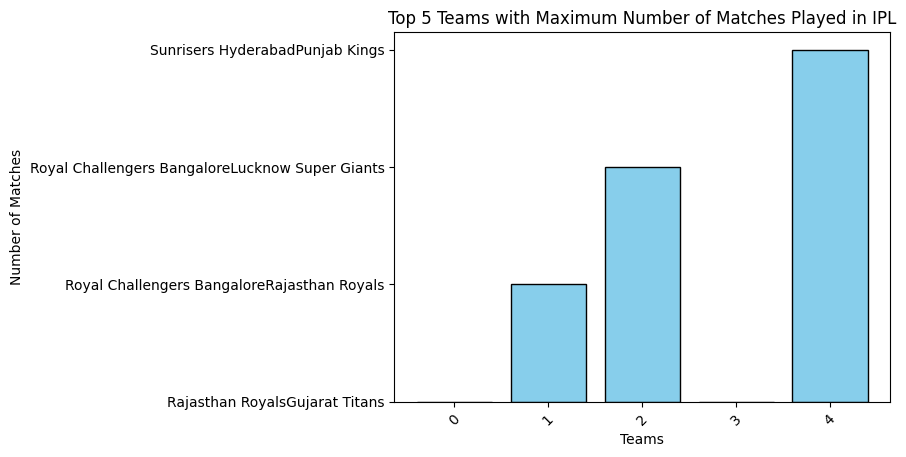

In [50]:
import matplotlib.pyplot as plt

total_team = ipl['Team1'] + ipl['Team2']
total_team.value_counts()
top_5_teams = total_team.head(5)

plt.bar(top_5_teams.index, top_5_teams.values, color='skyblue', edgecolor='black')
plt.title('Top 5 Teams with Maximum Number of Matches Played in IPL')
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

###`Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [55]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [56]:
matches_against_mi = ipl[((ipl['Team1'] == 'Mumbai Indians') & (ipl['WinningTeam'] != 'Mumbai Indians')) |
                         ((ipl['Team2'] == 'Mumbai Indians') & (ipl['WinningTeam'] != 'Mumbai Indians'))]

In [57]:
# code here
matches_against_mi['Player_of_Match'].value_counts().idxmax()

'SPD Smith'

###`Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [62]:
def match(team1, team2, ipl):
  matches_between_teams = ipl[((ipl['Team1'] == team1) & (ipl['Team2'] == team2)) |
                                ((ipl['Team1'] == team2) & (ipl['Team2'] == team1))]
  winsTeam1 = matches_between_teams[matches_between_teams['WinningTeam'] == team1].shape[0]
  winsTeam2 = matches_between_teams[matches_between_teams['WinningTeam'] == team2].shape[0]

  win_loss_record = f"{team1} : {winsTeam1} wins, {team2} : {winsTeam2} wins"

  player_of_match_counts = matches_between_teams['Player_of_Match'].value_counts()
  if not player_of_match_counts.empty:
      most_awarded_player = player_of_match_counts.idxmax()
  else:
      most_awarded_player = "No matches or awards data available."

  print(f"Win-Loss Record between {team1} and {team2}:")
  print(win_loss_record)
  print(f"\nPlayer with the most 'Player of the Match' awards between {team1} and {team2}: {most_awarded_player}")

In [64]:
match('Rajasthan Royals', 'Royal Challengers Bangalore', ipl)

Win-Loss Record between Rajasthan Royals and Royal Challengers Bangalore:
Rajasthan Royals : 12 wins, Royal Challengers Bangalore : 13 wins

Player with the most 'Player of the Match' awards between Rajasthan Royals and Royal Challengers Bangalore: AB de Villiers


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



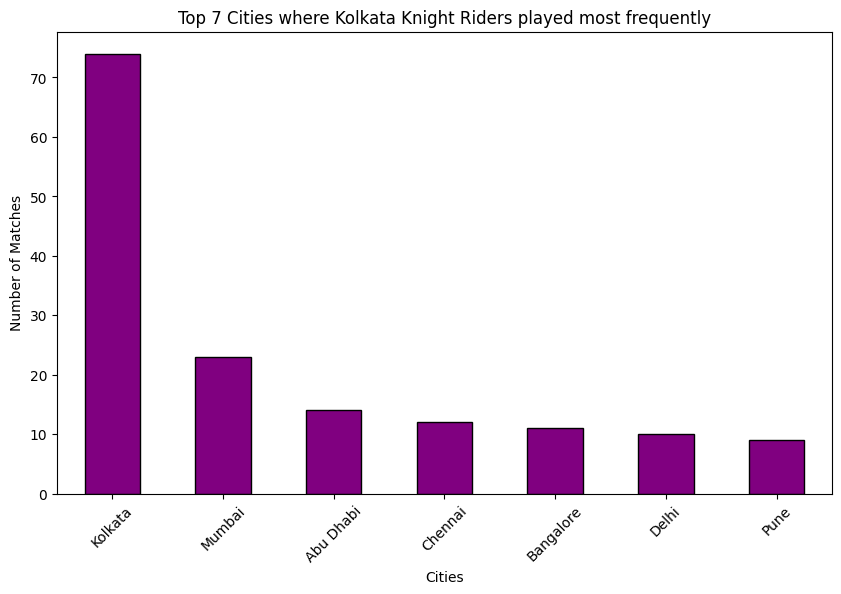

In [69]:
kkr = ipl[(ipl['Team1'] == 'Kolkata Knight Riders') | (ipl['Team2'] == 'Kolkata Knight Riders')]
matches = kkr['City'].value_counts()
top_7 = matches.head(7)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
top_7.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 7 Cities where Kolkata Knight Riders played most frequently')
plt.xlabel('Cities')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [70]:
# code here
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [77]:
matches_2011 = ipl[ipl['Season'] == 2011]

# Filter for matches won by Mumbai Indians
winning = matches_2011[matches_2011['WinningTeam'] == 'Mumbai Indians']
average = winning.mean()
average

,0
ID,NaN
City,NaN
Date,NaN
Season,NaN
MatchNumber,NaN
Team1,NaN
Team2,NaN
Venue,NaN
TossWinner,NaN
TossDecision,NaN
